In [1]:
import pandas as pd
from utils import get_data_dir
import matplotlib.pyplot as plt
import numpy as np
from typing import *

df = pd.read_csv(get_data_dir() / "train.csv")

#Given from the given project description
labels = ["airplane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [ ]:
plt.bar(*np.unique(df['Label'], return_counts=True))
plt.xticks(range(0,10), labels)
plt.xticks(rotation=45)
plt.title("Occurency of each class")

In [2]:
#Split the dataset into subframes for each unique class
subframes = [df[df['Label'] == i] for i in range(0,10)]

In [ ]:
# Calculate the number of NaN entries for each class
nan_counts = [np.sum(subframe.isna().any(axis=1)) for subframe in subframes]

# Make a plot of the occurrence of NaN values for each class
plt.figure(figsize=(5,5))
plt.title("Occurrence of NaN values for each class")
plt.bar(range(0,10), nan_counts)
plt.xticks(range(0,10), labels)
plt.xticks(rotation=45)
plt.show()


In [ ]:
plt.figure(figsize=(30,15))
plt.title("Occurency of NaN values for each feature")
plt.bar(range(len(df.columns)), df.isna().sum())  # Use len(df.columns) as the range
# Make the x-ticks
plt.xticks(range(len(df.columns)), df.columns, rotation=90)  # Use len(df.columns) as the range
plt.show()

In [3]:

def get_plot_distribution(subframe_list: List, column_name: str="Num_Col_0", num_cols:int = 5) -> plt.plot:
    num_rows = len(subframes) // num_cols + (len(subframes) % num_cols > 0) # Calculate number of rows needed
    # Create a figure and axis objects
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

    for i, subframe in enumerate(subframe_list):
        # Calculate row and column indices
        row_idx = i // num_cols
        col_idx = i % num_cols
        
        # Plot the distribution of values for a given column
        subframe.hist(column=column_name, bins=100, ax=axes[row_idx, col_idx])
        axes[row_idx, col_idx].set_title(f"Distr of {column_name} : {labels[int(subframe['Label'].iloc[0])]}")

    # Hide empty subplots (if any)
    for i in range(len(subframes), num_rows*num_cols):
        row_idx = i // num_cols
        col_idx = i % num_cols
        fig.delaxes(axes[row_idx, col_idx])

    plt.tight_layout()
    return plt

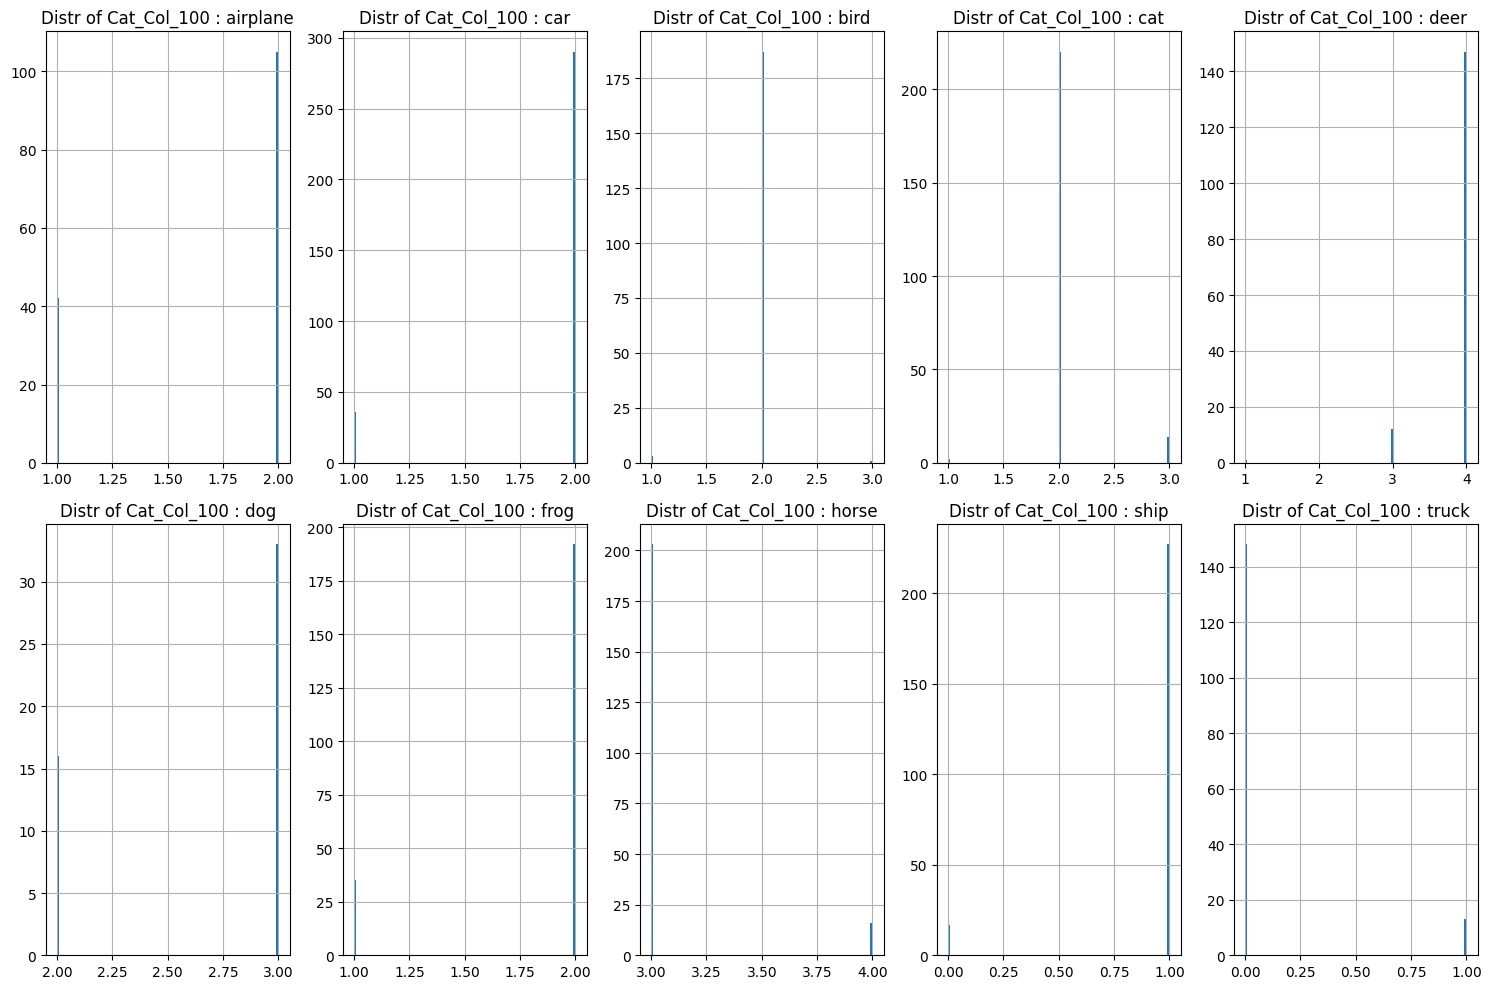

In [5]:
plot = get_plot_distribution(subframes, "Cat_Col_100", 5)

In [ ]:
def box_plot_subcolumn(df, start_col_index:int = 0, end_col_index:int = 5):
    subset_df = df.iloc[:, start_col_index:end_col_index]
    ax = plt.gca()
    subset_df.boxplot(ax=ax)
    plt.xticks(rotation=45)
    plt.title(label=labels[int(df['Label'].iloc[0])])

# Create a single figure for all the subplots
plt.figure(figsize=(15, 10))

# Define a grid layout for the subplots
grid_rows = 2
grid_columns = 5

for i in range(2):
    # Position the subplot in the grid
    plt.subplot(grid_rows, grid_columns, i+1)

    # Call the function to plot the box plot
    box_plot_subcolumn(subframes[i])

# Adjust the layout to prevent overlapping
plt.tight_layout()

# Show the combined plot
plt.show()


In [ ]:
def get_nan_stats(df):
    #Calculate the number of NaN values for each column
    nan_counts = df.isna().sum()
    return nan_counts

nan_counts = get_nan_stats(subframes[0])

# Plot the NaN stats as a bar chart
plt.bar(nan_counts.index, nan_counts)

# Labeling the axes and the plot
plt.xlabel('Column Names')
plt.ylabel('Number of NaNs')
plt.title('NaN Statistics for Columns')

# Rotating x-axis labels for better visibility (optional)
plt.xticks(rotation=45)

# Display the plot
plt.show()

In [ ]:
#Checking the NaN-statistics for the categorical columns


categorical_df = df.iloc[:,100:]
categorical_df

nan_counts = get_nan_stats(categorical_df)
plt.bar(nan_counts.index, nan_counts)
plt.xticks(rotation=90)
plt.show()